In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [1]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
x_train.shape, type(x_train),y_train.shape

((50000, 32, 32, 3), numpy.ndarray, (50000, 1))

In [43]:
import torch
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
import matplotlib.pyplot as plt
import numpy as np

class View(torch.nn.Module):
    def __init__(self,shape):
        super().__init__()
        self.shape = shape,
    def forward(self,x):
        return x.view(*self.shape)

class D(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.model = torch.nn.Sequential(
            torch.nn.Conv2d(3,30,5,2),
            torch.nn.LeakyReLU(0.02),
            torch.nn.BatchNorm2d(30),

            torch.nn.Conv2d(30,30,3,2),
            torch.nn.LeakyReLU(0.02),
            torch.nn.BatchNorm2d(30),
            
            View((-1,30*6*6)), 
            torch.nn.Linear(30*6*6,10),
            torch.nn.Softmax(),
            
        )
        self.classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

        self.optimizer = Adam(self.parameters(),lr=0.0002)
        self.loss_fn = CrossEntropyLoss()
        self.loss_hist =[]
        self.acc_hist = []
        self.counter = 0
        self.acc = 0

    def forward(self,x):
        return self.model(x)
    def train(self,x,label): #label은 onehot
        self.optimizer.zero_grad()
        y_pred = self.model(x)
        loss = self.loss_fn(y_pred,label)
        loss.backward()
        self.optimizer.step()
        
        self.loss_hist.append(loss.item())
        self.counter +=1
        
        if (y_pred.argmax()==label.argmax()):
            self.acc+=1
        if (self.counter%100==0):
            self.acc_hist.append(self.acc/100.0)
            print(f"iter {self.counter}, loss {self.loss_hist[-1]:.5f}, acc {self.acc/100.0:.2f}")
            self.acc=0
    def plot_10img(self,test_x,test_label):
        y_pred = self.model(test_x) # shape(10,10)
        idx_pred = y_pred.argmax(dim=1).detach().numpy()
        idx_label = test_label.argmax(dim=1).detach().numpy()
        fig,axes = plt.subplots(nrows=1,ncols=10,figsize=(15,3))
        fig.subplots_adjust(hspace=0.5, wspace=0.5)
        
        preds_single = []
        actual_single = []
        for i in range(10):
            preds_single.append(self.classes[idx_pred[i]])
            actual_single.append(self.classes[idx_label[i]])

        img_x = test_x.detach().numpy().transpose(0,2,3,1)
        for i in range(10):
            axes[i].axis('off')
            axes[i].text(0.5, 50.35, 'pred = ' + str(preds_single[i]), fontsize=10, ha='center') 
            axes[i].text(0.5, 40.7, 'act = ' + str(actual_single[i]), fontsize=10, ha='center')        
            axes[i].imshow(img_x[i])

        

In [10]:
d = D()
ones = torch.ones((1,3,32,32))
ones = torch.FloatTensor(ones)



tensor([0.0995, 0.1002, 0.1007, 0.0984, 0.0982, 0.1024, 0.0985, 0.1006, 0.1026,
        0.0989], grad_fn=<SoftmaxBackward0>)


tensor(8)

In [27]:
d = D()

x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)


# data (50000,32,32,3)
for data,label in zip(x_train,y_train):
    boolean_indexing = np.zeros((10)) #이거 왜 (label.shape[0],10)을 못하지? 이렇게 하려면 batchsize>1이라는 암묵적약속?
    boolean_indexing[int(label)] = 1.
    data = data.permute(2,0,1).view(1,3,32,32)/255.0
    d.train(data,torch.FloatTensor(boolean_indexing))

ValueError: Expected input batch_size (1) to match target batch_size (10).

In [16]:
for data,label in zip(x_train,y_train):
    boolean_indexing = np.zeros((10)) #이거 왜 (label.shape[0],10)을 못하지? 이렇게 하려면 batchsize>1이라는 암묵적약속?
    boolean_indexing[int(label)] = 1.
    data = data.permute(2,0,1).view(1,3,32,32)/255.0
    d.train(data,torch.FloatTensor(boolean_indexing))

iter 50100, loss 2.45198, acc 0.42
iter 50200, loss 1.95447, acc 0.51
iter 50300, loss 2.35076, acc 0.52
iter 50400, loss 1.46346, acc 0.44
iter 50500, loss 1.47123, acc 0.42
iter 50600, loss 2.20534, acc 0.49
iter 50700, loss 2.39826, acc 0.41
iter 50800, loss 2.41786, acc 0.37
iter 50900, loss 2.45490, acc 0.36
iter 51000, loss 2.45059, acc 0.44
iter 51100, loss 1.62109, acc 0.38
iter 51200, loss 2.42434, acc 0.44
iter 51300, loss 1.46125, acc 0.45
iter 51400, loss 1.46130, acc 0.45
iter 51500, loss 2.43377, acc 0.53
iter 51600, loss 1.46395, acc 0.40
iter 51700, loss 1.49275, acc 0.40
iter 51800, loss 2.42872, acc 0.43
iter 51900, loss 2.37991, acc 0.50
iter 52000, loss 1.47350, acc 0.46
iter 52100, loss 2.45612, acc 0.40
iter 52200, loss 1.47414, acc 0.48
iter 52300, loss 2.45072, acc 0.46
iter 52400, loss 1.46270, acc 0.39
iter 52500, loss 1.64819, acc 0.48
iter 52600, loss 2.45462, acc 0.43
iter 52700, loss 2.41372, acc 0.44
iter 52800, loss 2.44834, acc 0.45
iter 52900, loss 1.4

In [54]:

rand_idx = torch.randint(50000,(10,))
x_sample = x_train[rand_idx]
y_sample = y_train[rand_idx]
print(y_sample.shape,y_sample)
boolean_indexing = np.zeros((10,10)) #이거 왜 (label.shape[0],10)을 못하지? 이렇게 하려면 batchsize>1이라는 암묵적약속?
print(np.array(y_sample,dtype=np.int))
boolean_indexing[np.array(y_sample,dtype=np.int)] = 1.
print(boolean_indexing)

torch.Size([10, 1]) tensor([[7.],
        [2.],
        [3.],
        [3.],
        [5.],
        [0.],
        [3.],
        [2.],
        [5.],
        [6.]])
[[7]
 [2]
 [3]
 [3]
 [5]
 [0]
 [3]
 [2]
 [5]
 [6]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


C:\Users\gon\AppData\Local\Temp\ipykernel_14188\2319706076.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(np.array(y_sample,dtype=np.int))
C:\Users\gon\AppData\Local\Temp\ipykernel_14188\2319706076.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note 

In [66]:

b = np.random.randn(3,3)
print(b)
idx = np.array([[1],[2]])
print(b[[1],[2]],b[1,2])
b[idx]


[[ 1.1604984  -0.02650266  1.30294599]
 [-0.22288565 -1.45700569 -1.03825283]
 [-0.51190572  0.48540876 -1.15489947]]
[-1.03825283] -1.0382528292665034


array([[[-0.22288565, -1.45700569, -1.03825283]],

       [[-0.51190572,  0.48540876, -1.15489947]]])

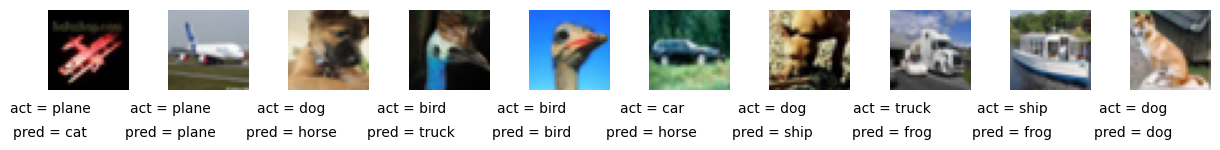

In [44]:
d =D()
rand_idx = torch.randint(50000,(10,))
x_sample = x_train[rand_idx]
y_sample = y_train[rand_idx]

x_list = []
y_list = []
for data,label in zip(x_sample,y_sample):
    boolean_indexing = np.zeros((10)) #이거 왜 (label.shape[0],10)을 못하지? 이렇게 하려면 batchsize>1이라는 암묵적약속?
    boolean_indexing[int(label)] = 1.
    data = data.permute(2,0,1)/255.0
    x_list.append(data.detach().numpy())
    y_list.append(boolean_indexing)
x_tensor = torch.FloatTensor(x_list)
y_tensor = torch.FloatTensor(y_list)
d.plot_10img(x_tensor,y_tensor)
